In [12]:
import yfinance as yfin
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Fetch NVIDIA stock data
start = '2023-01-13'
end = '2025-01-13'
df = yfin.download("NVDA", start=start, end=end)

# Use only the 'Close' prices
df = df[['Close']]
df = df.dropna()  # Drop missing values

print(df.head())


[*********************100%***********************]  1 of 1 completed

Price           Close
Ticker           NVDA
Date                 
2023-01-13  16.886717
2023-01-17  17.689135
2023-01-18  17.364372
2023-01-19  16.752813
2023-01-20  17.826035


In [16]:
# Scale data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

# Prepare data for LSTM
look_back = 60
X, y = [], []

for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape for LSTM input (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()

# LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10


D:\Artificiali\Anaconder\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1634
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0110
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0083
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0066
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0063
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0057
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0050
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0079
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0054
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0061


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


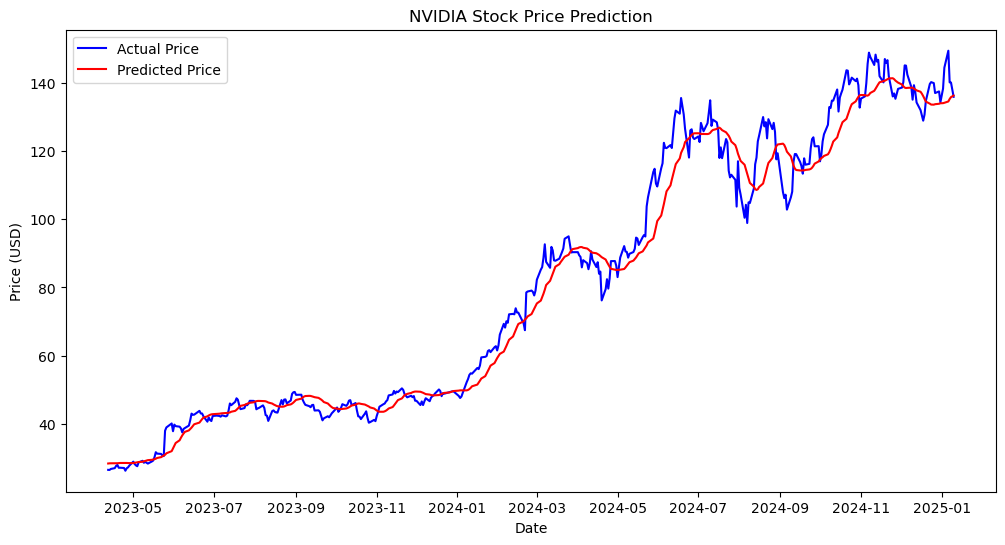

In [20]:
# Predict on the same data
predicted_price = model.predict(X)

# Reverse scaling to get actual values
predicted_price = scaler.inverse_transform(predicted_price)
actual_price = scaler.inverse_transform(y.reshape(-1, 1))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y):], actual_price, color='blue', label='Actual Price')
plt.plot(df.index[-len(predicted_price):], predicted_price, color='red', label='Predicted Price')
plt.title('NVIDIA Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [10]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(actual_price, predicted_price))
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 8.131954054745252


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━

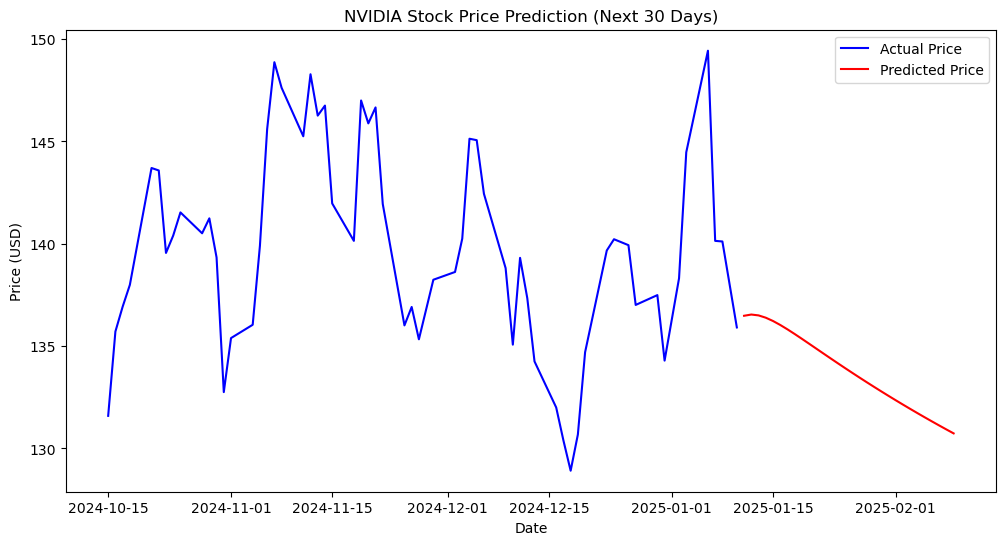

In [28]:
# Predict next few months
predictions = []
last_data = scaled_data[-look_back:]

for i in range(30):  # Predict for 30 days ahead
    # Reshape input to match the LSTM expected input format
    last_data = last_data.reshape((1, look_back, 1))
    
    # Predict next value
    predicted_value = model.predict(last_data)
    
    # Append prediction to results and update input sequence
    predictions.append(predicted_value[0, 0])
    last_data = np.append(last_data[:, 1:, :], predicted_value.reshape(1, 1, 1), axis=1)

# Reverse scaling
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index[-60:], df['Close'][-60:], color='blue', label='Actual Price')  # Plot the last 60 actual prices
plt.plot(pd.date_range(df.index[-1], periods=31, freq='D')[1:], predicted_prices, color='red', label='Predicted Price')
plt.title('NVIDIA Stock Price Prediction (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
